In [119]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [120]:
import pandas as pd
file_name='finance_data/Sentences_AllAgree.txt'
f = open(file_name)
data=[]
for line in f:
        line = line.replace('\n', '')
        data.append(line.split('@'))
data=pd.DataFrame(data,columns=['contenu','target'])

In [121]:
wordcloud = WordCloud(random_state=8)

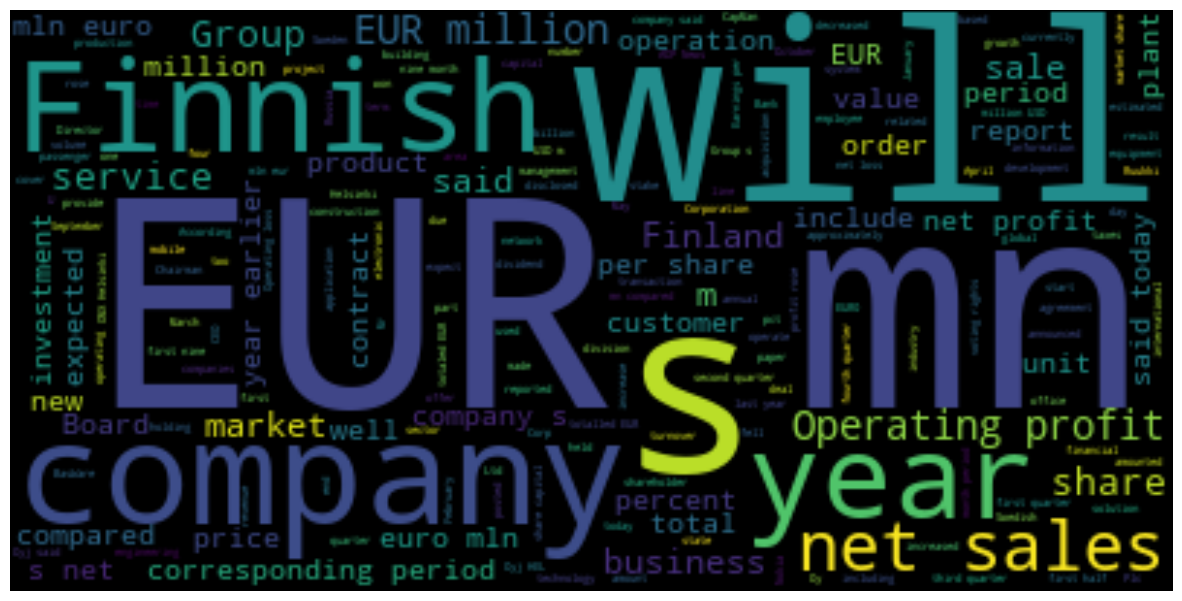

In [122]:
text=' '.join(i for i in data.contenu)
wordcloud.generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [123]:
# right the top 20 stopwords in the wordcloud dic
print(list(WordCloud().stopwords)[:20])

['was', 'be', 'it', 'our', 'ourselves', 'that', "he'd", 'an', 'so', 'having', 'com', 'about', 'hers', "he's", 'therefore', "here's", 'being', 'or', "they're", "he'll"]


In [124]:
data.iloc[-2].contenu    

'Operating profit fell to EUR 35.4 mn from EUR 68.8 mn in 2007 , including vessel sales gain of EUR 12.3 mn .'

In [125]:
import numpy as np
y=data.target.astype(str)
punct_pattern=r'[\!"#$%&\*+,-./:;?@^_`()|~]'
data.loc[:,'contenu_no_puct']=data.contenu.str.replace(punct_pattern,'')




C:\Users\Haboubi\AppData\Local\Temp\ipykernel_9464\2233800491.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  data.loc[:,'contenu_no_puct']=data.contenu.str.replace(punct_pattern,'')


In [126]:
data.iloc[-2].contenu_no_puct    

'Operating profit fell to EUR 354 mn from EUR 688 mn in 2007  including vessel sales gain of EUR 123 mn '

In [127]:
import re 
# remove numbers from data set
digitspattern = r'[0-9]'

data.loc[:,'contenu_no_num_no_punc']=data.contenu_no_puct.str.replace(digitspattern,'')



C:\Users\Haboubi\AppData\Local\Temp\ipykernel_9464\2399179355.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data.loc[:,'contenu_no_num_no_punc']=data.contenu_no_puct.str.replace(digitspattern,'')


In [128]:
data.iloc[-2].contenu_no_num_no_punc

'Operating profit fell to EUR  mn from EUR  mn in   including vessel sales gain of EUR  mn '

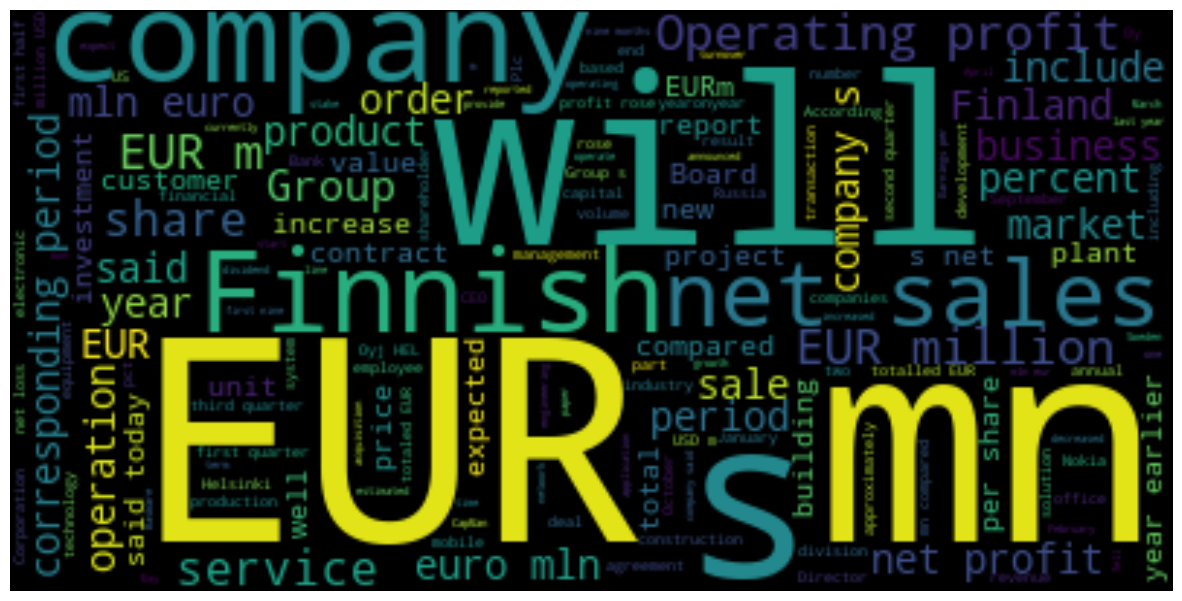

In [129]:
wordcloud.generate(' '.join(i for i in data.contenu_no_num_no_punc))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [130]:
# we will remove 'country's name (finnish is frequent here) 

In [131]:

spacepattern=r'\s\s+'
data.loc[:,'contenu_no_num_no_punc']=data.contenu_no_num_no_punc.str.replace(spacepattern,' ')



C:\Users\Haboubi\AppData\Local\Temp\ipykernel_9464\120573226.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data.loc[:,'contenu_no_num_no_punc']=data.contenu_no_num_no_punc.str.replace(spacepattern,' ')


In [132]:
data.contenu_no_num_no_punc[3]

'Operating profit rose to EUR mn from EUR mn in the corresponding period in representing of net sales '

In [133]:
data.contenu[3]

'Operating profit rose to EUR 13.1 mn from EUR 8.7 mn in the corresponding period in 2007 representing 7.7 % of net sales .'

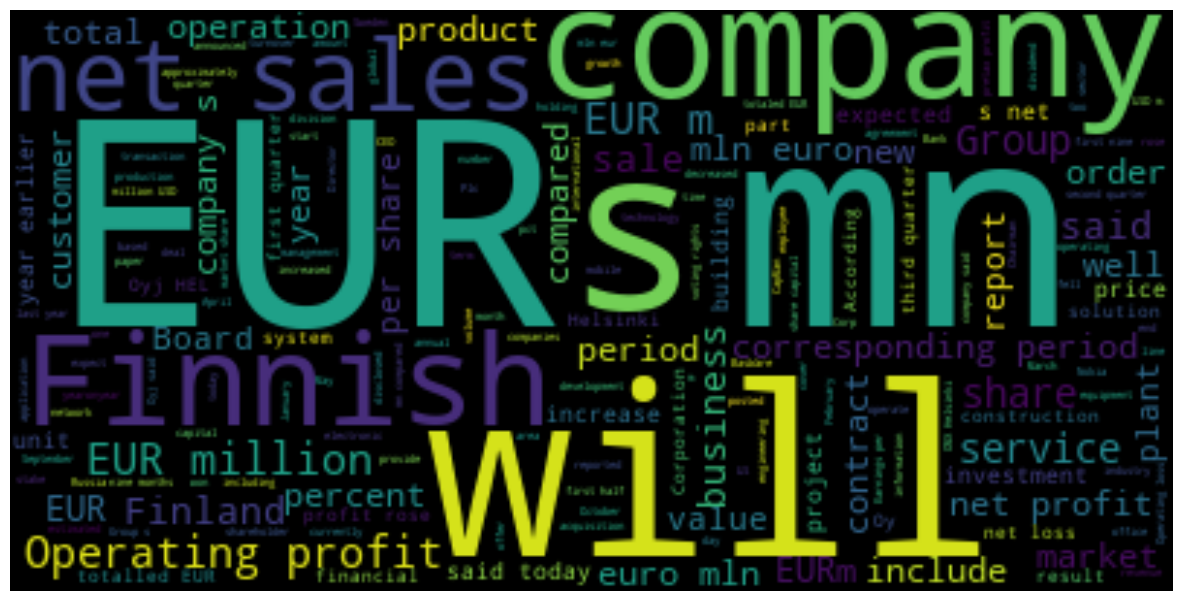

In [134]:
wordcloud.generate(' '.join(i for i in data.contenu_no_num_no_punc))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [135]:
# transform label into numbers
data.loc[data['target']=='neutral','target']=0
data.loc[data['target']=='positive','target']=1
data.loc[data['target']=='negative','target']=2

y=data.target.astype(int)

#### Vectorize the text we would use Sckitis-learn has three types of vectorization 
###### we would work with CountVectorizer and TF-IDF

In [136]:
import spacy 

nlp=spacy.load('en_core_web_sm')

In [137]:
def lemmatize(text):
    doc=nlp(text)   
    tokens=[token.lemma_ for token in doc if not (token.is_stop or token.is_punct or len(token.lemma_)<=2)]

    return ' '.join(tokens)
def POS(text):
    doc=nlp(text)   
    pos=[token.pos_ for token in doc if not (token.is_stop or len(token.lemma_)<=2)]

    return ' '.join(pos)
def NER(text):
    doc=nlp(text)   

    tokens=[token.lemma_ for token in doc if not (token.is_stop )]

    ner=[]
    for i in tokens:
        j=False
        for ent in doc.ents:
            if i in ent.text:
                ner.append(ent.label_)
                j=True

        if j==False:
            ner.append(i)
    return ' '.join(ner)
        

In [138]:
data['processed_text']=data.contenu_no_num_no_punc.apply(lambda txt : lemmatize(txt))


In [139]:
data['pos']=data.contenu_no_num_no_punc.apply(lambda txt : POS(txt))


In [166]:
data['ner']=data.contenu_no_num_no_punc.apply(lambda txt : NER(txt))

In [141]:
data['ner']

0       accord PERSON company plan production GPE comp...
1       DATE ORG net sale double EURm EURm DATE DATE e...
2       DATE net sale increase ORG ORG mn operating pr...
3       operate profit rise ORG ORG mn ORG ORG mn corr...
4       operate profit total ORG ORG mn ORG ORG mn rep...
                              ...                        
2259    operate result DATE period decrease profit ORG...
2260    ORG ORG ORG ORG GPE fall sharply TIME TIME tra...
2261    GPE MarketWatch share price end lower GPE DATE...
2262    operate profit fall ORG ORG ORG mn ORG ORG ORG...
2263    sale GPE GPE decrease DATE sale outside GPE GP...
Name: ner, Length: 2264, dtype: object

In [142]:
def VERB_ADJ(text):
    doc=nlp(text)   
    pos=[token.lemma_.lower() for token in doc if  (token.is_stop==False and (token.pos_=='VERB'))]
    return ' '.join(pos)


In [143]:
#data['ner']=data.contenu_no_num_no_punc.apply(lambda txt : VERB_ADJ(txt))

In [144]:
# The CountVectorizer counts the word occurrences in each document.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

cv = CountVectorizer(stop_words='english')
X=cv.fit_transform((data.processed_text))
print(X.shape)
print(type(X))
vocab = cv.get_feature_names_out()
docterm = pd.DataFrame(X.todense(), columns=vocab)


(2264, 4444)
<class 'scipy.sparse._csr.csr_matrix'>


In [145]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=4)
X_train.shape

(1811, 4444)

In [146]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
clf=MultinomialNB()

clf.fit(X_train,y_train)

yhat = clf.predict(X_train)
print("Accuracy: ",accuracy_score(y_train, yhat))

Accuracy:  0.9055770292655991


In [147]:
yhat = clf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, yhat))

Accuracy:  0.7902869757174393


In [148]:
# use TfidfVectorizer

In [149]:
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# apply the vectorizer to the corpus
X = vectorizer.fit_transform(data.ner)

# display the document-term matrix
vocab = vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X.todense(), columns=vocab)

In [150]:
 docterm

,able,abp,abroad,absentee,aca,access,accessory,accommodate,accommodation,accord,...,yield,yit,yy,zinc,zone,zu,àland,àmñl,ál,áá
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.398768,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=4)
X_train.shape

(1811, 3157)

In [152]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
clf=MultinomialNB()

clf.fit(X_train,y_train)

yhat = clf.predict(X_train)
print("Accuracy: ",accuracy_score(y_train, yhat))

Accuracy:  0.804527885146328


In [153]:
yhat = clf.predict(X_test)
print("Accuracy: ",accuracy_score(y_test, yhat))

Accuracy:  0.7549668874172185


In [167]:
# The CountVectorizer counts the word occurrences in each document.
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

cv = CountVectorizer(stop_words='english')
X=cv.fit_transform((data.ner))
print(X.shape)
print(type(X))
vocab = cv.get_feature_names_out()
docterm = pd.DataFrame(X.todense(), columns=vocab)


(2264, 3128)
<class 'scipy.sparse._csr.csr_matrix'>


In [170]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=4)
X_train.shape

(1811, 3128)

In [171]:
from sklearn.metrics import recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


ada_classifier = AdaBoostClassifier()

dt_classifier = DecisionTreeClassifier()

randfor_classifier = RandomForestClassifier()


fit_ada = ada_classifier.fit(X_train, y_train)
fit_dt = dt_classifier.fit(X_train, y_train)
fit_gnb = randfor_classifier.fit(X_train, y_train)  # GaussianNB attend des matrices denses

pred_ada = fit_ada.predict(X_test)
pred_dt = fit_dt.predict(X_test)
pred_gnb = fit_gnb.predict(X_test)

probabilities_ada = fit_ada.predict_proba(X_test)[:, 1]
print('AdaBoostClassifier',accuracy_score(y_test, pred_ada))
print('DecisionTreeClassifier',accuracy_score(y_test, pred_dt))
print('GaussianNB',accuracy_score(y_test, pred_gnb))


AdaBoostClassifier 0.8410596026490066
DecisionTreeClassifier 0.8631346578366446
GaussianNB 0.8653421633554084


In [172]:
from sklearn.metrics import recall_score, f1_score
recall_ada = recall_score(y_test, pred_ada,average='weighted')
f1_ada=f1_score(y_test, pred_ada,average='weighted')
recall_dt = recall_score(y_test, pred_dt,average='weighted')
f1_dt=f1_score(y_test, pred_dt,average='weighted')
recall_gnb =recall_score(y_test, pred_gnb,average='weighted')
f1_gnb=f1_score(y_test, pred_gnb,average='weighted')


In [173]:
print("Comparaison des modèles :")
print("AdaBoostClassifier :")
print("Recall (Rappel) : {:.2f}%".format(recall_ada * 100))
print("F1-Score : {:.2f}%".format(f1_ada * 100))
print("\nDecisionTreeClassifier :")
print("Recall (Rappel) : {:.2f}%".format(recall_dt * 100))
print("F1-Score : {:.2f}%".format(f1_dt * 100))
print("\nGaussianNB :")
print("Recall (Rappel) : {:.2f}%".format(recall_gnb * 100))
print("F1-Score : {:.2f}%".format(f1_gnb * 100))

Comparaison des modèles :
AdaBoostClassifier :
Recall (Rappel) : 84.11%
F1-Score : 83.56%

DecisionTreeClassifier :
Recall (Rappel) : 86.31%
F1-Score : 86.09%

GaussianNB :
Recall (Rappel) : 86.53%
F1-Score : 85.93%


In [174]:
pridct=['Sales hit record high last quarter','Operating profit fell to 10 EUR   from 20 EUR   in 2007   including vessel sales gain of EUR 12 3 mn ','sales decrease last quarter','i went to the shop','more efficient in workplace','Congratulations! you have won  Walmart gift card','profit rise from 100 to 2000']

ner_pred=[]
for i in pridct:
    ner_pred.append(NER(i))
ner_pred

['sale hit record high DATE',
 'operate profit fall CARDINAL ORG ORG ORG    CARDINAL DATE ORG ORG ORG    DATE    include vessel sale gain ORG ORG ORG CARDINAL CARDINAL mn',
 'sale decrease DATE',
 'go shop',
 'efficient workplace',
 'congratulation ! win   ORG gift card',
 'profit rise CARDINAL CARDINAL']

In [175]:
prd=cv.transform(ner_pred)

In [176]:
pred=fit_dt.predict(prd)
pred

array([1, 2, 2, 0, 1, 1, 1])

In [177]:
import pickle
with open('models/model_sentiment_analysis/model.pk','wb') as f:
    pickle.dump(fit_dt,f)

In [178]:
with open('models/model_sentiment_analysis/model.pk','rb') as f:
    model=pickle.load(f)

In [179]:
model.predict(prd)

array([1, 2, 2, 0, 1, 1, 1])

### save CounterVectorizer 

In [180]:
with open('models/model_sentiment_analysis/CounterVectorizer.pk','wb') as f:
    pickle.dump(cv,f)

In [182]:
with open('models/model_sentiment_analysis/CounterVectorizer.pk','rb') as f:
    model=pickle.load(f)